![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [2]:
import pandas as pd 
import seaborn as sb

**Read `Salaries.csv` as a dataframe called `sal`.**

In [3]:
# link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv")

**Check the head of the DataFrame.**

In [4]:
sal.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [ ]:
sal.info()

What is the average BasePay ?

In [13]:
print('The average BasePay is: ',sal['BasePay'].mean())

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [12]:
print('The Lowest amount of BasePay is: ',sal['BasePay'].min())

-166.01

In [14]:
print('The Highest amount of BasePay is: ',sal['BasePay'].max())

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [163]:
print('Mean of OvertimePay is ',sal['OvertimePay'].mean())
print('Max of OvertimePay is ',sal['OvertimePay'].min())
print('Min of OvertimePay is ',sal['OvertimePay'].max())

Mean of OvertimePay is  5066.059886444622
Max of OvertimePay is  -0.01
Min of OvertimePay is  245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [35]:
sal[sal['EmployeeName'] == "JOSEPH DRISCOLL"]['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [40]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal['EmployeeName'] == "GARY JIMENEZ"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [42]:
sal[sal['EmployeeName'] == "JOSEPH DRISCOLL"]['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [16]:
#Solution 1 
#---------------
#sort dataframe by descending and get first row -> store at tmp
tmp = sal.sort_values(by = 'TotalPayBenefits', ascending = False).head(1)
#get two columns EmplyeeName and TotalPayBenefits
print(tmp[['EmployeeName','TotalPayBenefits']])

     EmployeeName  TotalPayBenefits
0  NATHANIEL FORD         567595.43


In [15]:
#Solution 2
#---------------
#Get row where there is the highest TotalPayBenefits
tmp = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()][['EmployeeName','TotalPayBenefits']]
print(tmp)

     EmployeeName  TotalPayBenefits
0  NATHANIEL FORD         567595.43


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [17]:
#Solution 1 
#---------------
#sort dataframe by descending and get first row -> store at tmp
tmp = sal.sort_values(by = 'TotalPayBenefits', ascending = True).head(1)
#get two columns EmplyeeName and TotalPayBenefits
print(tmp[['EmployeeName','TotalPayBenefits']])

       EmployeeName  TotalPayBenefits
148653    Joe Lopez           -618.13


In [18]:
#Solution 2
#---------------
#Get rows where there is the highest TotalPayBenefits
tmp = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()][['EmployeeName','TotalPayBenefits']]
print(tmp)

       EmployeeName  TotalPayBenefits
148653    Joe Lopez           -618.13


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [20]:
sal.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [25]:
sal['JobTitle'].unique().shape[0]

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [53]:
tmp = sal['JobTitle'].value_counts(sort = True).head(5)
tmp

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [101]:
year13 = sal[sal['Year'] == 2013] #extract rows that have value of year == 2k13
countJobUnique = year13.groupby(['JobTitle']) #Group by JobTitle 
tmp = countJobUnique.size() #calculate size 
result = tmp[tmp==1] #take row with size == 1
result.size

202

**How many people have the word Chief in their job title?**

In [138]:
def checkChiefIn(s): #function check: Is Chief in str.... ? 
    if s.find('Chief') != -1:
        return True
    return False

count = 0 #Initiate variable count for counting
for i in range(sal.shape[0]):
    if checkChiefIn(sal.at[i,'JobTitle']) == True:
        count+=1
        
print('The number of rows that JobTitle"s value has "Chief" is',count)#print Output 

The number of rows that JobTitle"s value has "Chief" is 423


## Data Visualization

**Implement seaborn's countplot with x='Year'**

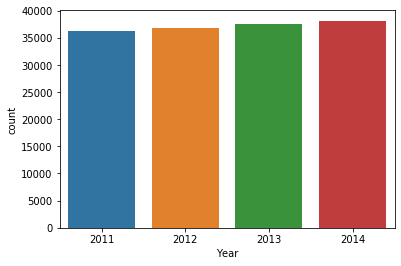

In [140]:
sb.countplot(x='Year', data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

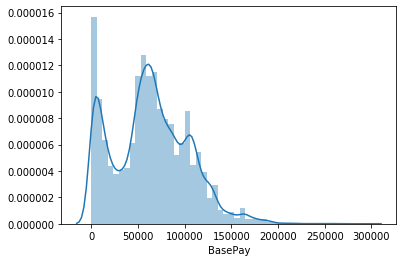

In [161]:
tmp = sal[sal['Year'] == 2011]
sb.distplot(tmp['BasePay'])

**How about other Year**

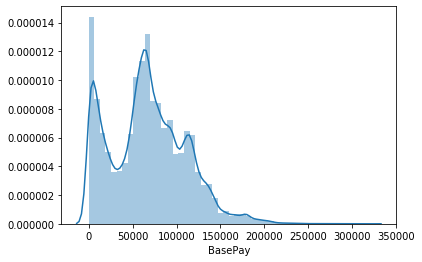

In [162]:
tmp = sal[sal['BasePay'].notnull()]
tmp = tmp[tmp['Year']!=2011]
sb.distplot(tmp['BasePay'])

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

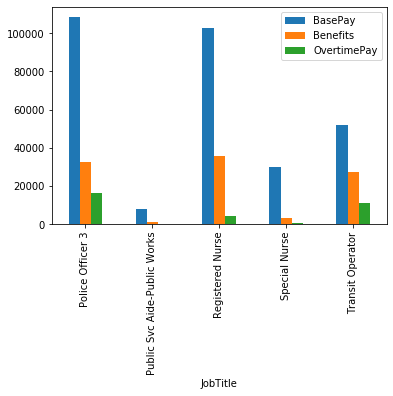

In [10]:
groupJobTitle = sal.groupby('JobTitle').mean()
indexJob = sal['JobTitle'].value_counts().head(5).index
result = groupJobTitle[groupJobTitle.index.isin(indexJob)][['BasePay','Benefits','OvertimePay']]
result.plot(kind = 'bar')

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [15]:
for i in range(sal.shape[0]):
    sal.at[i,'lenOfJobTitle'] = len(sal.at[i,'JobTitle'])
sal.corr()
#arcoding output table->answer is YES

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status,lenOfJobTitle
Id,1.000000,-0.204878,-0.081505,-0.100403,-0.348957,-0.211478,-0.092190,0.968171,NaN,NaN,-0.085332
BasePay,-0.204878,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751,NaN,NaN,-0.005059
OvertimePay,-0.081505,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887,NaN,NaN,-0.017172
OtherPay,-0.100403,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499,NaN,NaN,-0.042587
Benefits,-0.348957,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136,NaN,NaN,-0.021469
TotalPay,-0.211478,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090,NaN,NaN,-0.015356
TotalPayBenefits,-0.092190,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947,NaN,NaN,-0.036878
Year,0.968171,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000,NaN,NaN,-0.088883
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Great Job!